In [1]:
# Get general purpose APIs first
import numpy as np
import matplotlib.pyplot as plt

# load the Pytorch APIs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

# Device setup
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

2025-03-06 04:00:11.018754: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741233611.063354     329 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741233611.075803     329 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 04:00:11.176879: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
batch_size = 64
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# train_images = tf.keras.utils.to_categorical(train_images, num_classes=10)
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
# test_images = tf.keras.utils.to_categorical(test_images, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)


Train size: 50000
Test size: 10000


I0000 00:00:1741233616.872599     329 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9639 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(224,224))

    return image,label

train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=batch_size,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=batch_size,drop_remainder=True)
         )

In [ ]:
train_ds.element_spec

In [ ]:
# ##convertir a ALEX MODEL

# inputs = tf.keras.Input(shape=(224, 224, 3))
# x = inputs
# #x = data_augmentation(inputs)
# #x = tf.keras.layers.Rescaling(1./255)(inputs)
# x = tf.keras.layers.Conv2D(filters=64, kernel_size=11, strides=(4, 4), activation="relu")(x)
# x = tf.keras.layers.MaxPooling2D(pool_size=3,strides=(4, 4))(x)
# # x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
# # x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
# #x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
# #x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
# #x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
# #x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
# #x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
# x = tf.keras.layers.Flatten()(x)
# #x = tf.keras.layers.Dropout(0.2)(x)
# outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
# model = tf.keras.Model(inputs=inputs, outputs=outputs)
# model.summary()

In [ ]:
# def AlexNet(num_classes=10, dropout=0.5):
#     inputs = keras.Input(shape=(227, 227, 3))  # Tamaño de entrada estándar de AlexNet
    
#     # Bloque de características (feature extractor)
#     x = layers.Conv2D(64, kernel_size=11, strides=4, padding="same", activation="relu")(inputs)
#     x = layers.MaxPooling2D(pool_size=3, strides=2)(x)
    
#     x = layers.Conv2D(192, kernel_size=5, padding="same", activation="relu")(x)
#     x = layers.MaxPooling2D(pool_size=3, strides=2)(x)
    
#     x = layers.Conv2D(384, kernel_size=3, padding="same", activation="relu")(x)
#     x = layers.Conv2D(256, kernel_size=3, padding="same", activation="relu")(x)
#     x = layers.Conv2D(256, kernel_size=3, padding="same", activation="relu")(x)
#     x = layers.MaxPooling2D(pool_size=3, strides=2)(x)
    
#     # Capa de Pooling Adaptativo (reemplazada por Flatten, ya que Keras maneja tamaños de entrada flexibles)
#     x = layers.Flatten()(x)
    
#     # Clasificador totalmente conectado
#     x = layers.Dropout(dropout)(x)
#     x = layers.Dense(4096, activation="relu")(x)
#     x = layers.Dropout(dropout)(x)
#     x = layers.Dense(4096, activation="relu")(x)
#     x = layers.Dense(num_classes, activation="softmax")(x)
    
#     model = keras.Model(inputs, x, name="AlexNet")
#     return model

# # Crear el modelo
# model = AlexNet(num_classes=10)
# model.summary()

In [4]:
# Definir el modelo AlexNet
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=11, strides=4, padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),
    tf.keras.layers.Conv2D(192, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),
    tf.keras.layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 64)     │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 192)    │       307,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,044,810 (217.61 MB)

 Trainable params: 57,044,810 (217.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # Definir el modelo AlexNet adaptado para CIFAR-10
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
#     tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     tf.keras.layers.Conv2D(192, kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     tf.keras.layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(4096, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(4096, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
# model.summary()

In [ ]:
  ##EJEMPLO DE PYTORCH NO CORRER

#   class AlexNet(nn.Module):
#       def __init__(self, num_classes: int = 10, dropout: float = 0.5) -> None:
#           super().__init__()
#           #_log_api_usage_once(self)
#           self.features = nn.Sequential(
#               nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
#               nn.ReLU(inplace=True),
#               nn.MaxPool2d(kernel_size=3, stride=2),
#               nn.Conv2d(64, 192, kernel_size=5, padding=2),
#               nn.ReLU(inplace=True),
#               nn.MaxPool2d(kernel_size=3, stride=2),
#               nn.Conv2d(192, 384, kernel_size=3, padding=1),
#               nn.ReLU(inplace=True),
#               nn.Conv2d(384, 256, kernel_size=3, padding=1),
#               nn.ReLU(inplace=True),
#               nn.Conv2d(256, 256, kernel_size=3, padding=1),
#               nn.ReLU(inplace=True),
#               nn.MaxPool2d(kernel_size=3, stride=2),
#           )
#           self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
#           self.classifier = nn.Sequential(
#               nn.Dropout(p=dropout),
#               nn.Linear(256 * 6 * 6, 4096),
#               nn.ReLU(inplace=True),
#               nn.Dropout(p=dropout),
#               nn.Linear(4096, 4096),
#               nn.ReLU(inplace=True),
#               nn.Linear(4096, num_classes),
#           )

#       def forward(self, x: torch.Tensor) -> torch.Tensor:
#           x = self.features(x)
#           x = self.avgpool(x)
#           x = torch.flatten(x, 1)
#           x = self.classifier(x)
#           return x

In [ ]:
# model.compile(
#     optimizer='rmsprop',  # We can experiment with other optimizers
#     loss='categorical_crossentropy', # Let's use 'categorical_crossentropy' for > 2 classes  binary_crossentropy for classes  =2
#     metrics=['accuracy']
# )

In [5]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])

In [6]:
# history=model.fit(
#     train_ds,
#     epochs=10,
#     batch_size=batch_size,
#     verbose=1,
#     validation_data=test_ds,

# )


# Entrenar el modelo
history=model.fit(train_ds, epochs=30, batch_size=64, validation_data=test_ds)


Epoch 1/30


I0000 00:00:1741233650.871539     391 service.cc:148] XLA service 0x74e7ac0026b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741233650.873506     391 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-03-06 04:00:50.909365: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741233651.086360     391 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-06 04:00:51.231820: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


  3/781 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - accuracy: 0.1302 - loss: 5.3535 

I0000 00:00:1741233658.302431     391 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3154 - loss: 1.9325

2025-03-06 04:01:45.869495: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_115', 196 bytes spill stores, 196 bytes spill loads

2025-03-06 04:01:45.988768: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_115', 236 bytes spill stores, 236 bytes spill loads

2025-03-06 04:01:46.155377: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_122', 104 bytes spill stores, 104 bytes spill loads

2025-03-06 04:01:46.565485: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_122', 412 bytes spill stores, 412 bytes spill loads



781/781 ━━━━━━━━━━━━━━━━━━━━ 67s 69ms/step - accuracy: 0.3156 - loss: 1.9318 - val_accuracy: 0.4989 - val_loss: 1.3661
Epoch 2/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 56s 64ms/step - accuracy: 0.5313 - loss: 1.3091 - val_accuracy: 0.5949 - val_loss: 1.1530
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 58s 67ms/step - accuracy: 0.6017 - loss: 1.1327 - val_accuracy: 0.6267 - val_loss: 1.0389
Epoch 4/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 57s 65ms/step - accuracy: 0.6467 - loss: 1.0208 - val_accuracy: 0.6438 - val_loss: 1.0221
Epoch 5/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 56s 65ms/step - accuracy: 0.6686 - loss: 0.9641 - val_accuracy: 0.6779 - val_loss: 0.9321
Epoch 6/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 59s 69ms/step - accuracy: 0.6874 - loss: 0.8987 - val_accuracy: 0.6327 - val_loss: 1.0449
Epoch 7/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 58s 66ms/step - accuracy: 0.6960 - loss: 0.8818 - val_accuracy: 0.6510 - val_loss: 1.0037
Epoch 8/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 57s 65ms/step - accuracy: 0.7024 - loss: 0.8654 - val_accurac

In [ ]:
# Evaluar el modelo
# test_loss, test_acc = model.evaluate(x_test_resized, y_test)
# print(f'Test accuracy: {test_acc}')

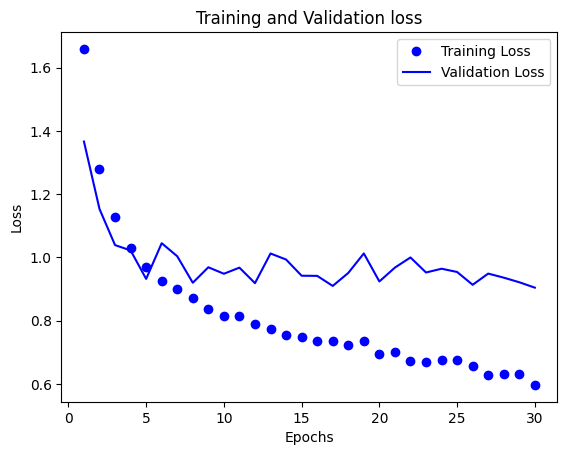

In [7]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

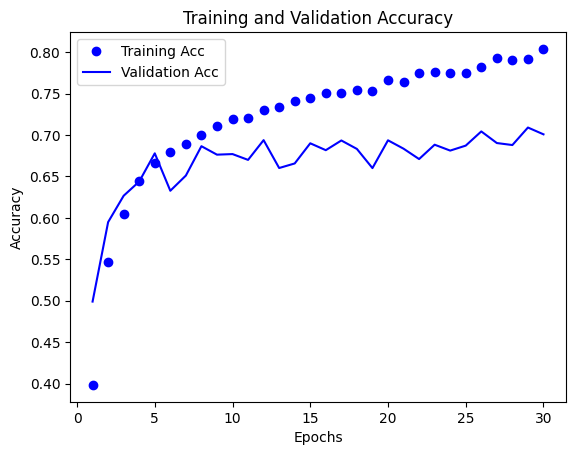

Done


In [8]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc,'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print ("Done")

In [9]:
model.save("./imgSegExcercise/Playground/TrainedFullModel.keras")

# Nueva propuesta

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models, datasets, utils
# from keras.utils import to_categorical
# import numpy as np # linear algebra
# import cv2


In [ ]:
# def load_cifar10_data(img_rows, img_cols):

#     # Load cifar10 training and validation sets
#     (X_train, Y_train), (X_valid, Y_valid) = datasets.cifar10.load_data()

#     # Resize training images
#     X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:,:]])
#     X_valid = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_valid[:,:,:,:]])

#     # Transform targets to keras compatible format
#     Y_train = to_categorical(Y_train, 10)
#     Y_valid = to_categorical(Y_valid, 10)

#     X_train = X_train.astype('float32')
#     X_valid = X_valid.astype('float32')

#     # preprocess data
#     X_train = X_train / 255.0
#     X_valid = X_valid / 255.0

#     return X_train, Y_train, X_valid, Y_valid

# x_train, y_train, x_test, y_test = load_cifar10_data(224, 224)

In [ ]:
# # Cargar el dataset CIFAR-10
# (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# # Redimensionar las imágenes a 224x224
# def resize_images(images, size=(224, 224)):
#     return tf.image.resize(images, size)

# x_train_resized = resize_images(x_train)
# x_test_resized = resize_images(x_test)

# # Normalizar las imágenes
# x_train_resized, x_test_resized = x_train_resized / 255.0, x_test_resized / 255.0

# # Convertir las etiquetas a one-hot encoding
# y_train = utils.to_categorical(y_train, 10)
# y_test = utils.to_categorical(y_test, 10)

In [ ]:
# # Definir el modelo AlexNet
# model = models.Sequential([
#     layers.Conv2D(64, kernel_size=11, strides=4, padding='same', activation='relu', input_shape=(224, 224, 3)),
#     layers.MaxPooling2D(pool_size=3, strides=2),
#     layers.Conv2D(192, kernel_size=5, padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=3, strides=2),
#     layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
#     layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
#     layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=3, strides=2),
#     layers.Flatten(),
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(10, activation='softmax')
# ])
# model.summary()

In [ ]:
# # Compilar el modelo
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Entrenar el modelo
# model.fit(x_train_resized, y_train, epochs=10, batch_size=64, validation_data=(x_test_resized, y_test))

# # Evaluar el modelo
# test_loss, test_acc = model.evaluate(x_test_resized, y_test)
# print(f'Test accuracy: {test_acc}')